ibmqfactory.load_account:WARNING:2022-04-09 22:34:52,699: Credentials are already in use. The existing account in the session will be replaced.


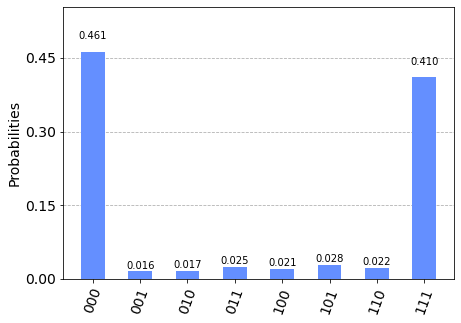

In [9]:
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

# Build noise model from backend properties
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_lima')
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(3, 3)

circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

meas = QuantumCircuit(3,3)
meas.measure([0, 1, 2], [0, 1, 2])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
drawing = circ.compose(meas)
result2 = backend.run(transpile(drawing,backend), shots=10).result()
counts2 = result.get_counts(circ)
counts = result.get_counts(0)
plot_histogram(counts)
plot_histogram(counts2)
